<a href="https://www.kaggle.com/code/reannatse/stroke-prediction?scriptVersionId=270841516" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# *1. Load dataset*

In [2]:
import pandas as pd

stroke_data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# *2. Conduct EDA*

In [3]:
print('data shape:')
print(stroke_data.shape)

print('\ndata preview:')
print(stroke_data.head())

print('\nmissing data:')
print(stroke_data.isnull().sum())

print('\nduplicated rows:')
print(stroke_data.duplicated().sum())

print('\ndata info:')
print(stroke_data.info())

data shape:
(5110, 12)

data preview:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

missing data:
id 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# *3. Create data visualisation*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


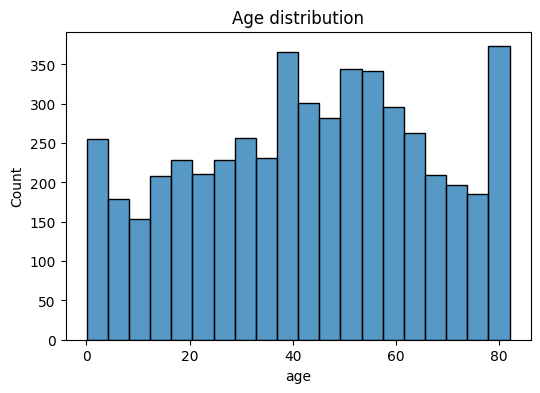

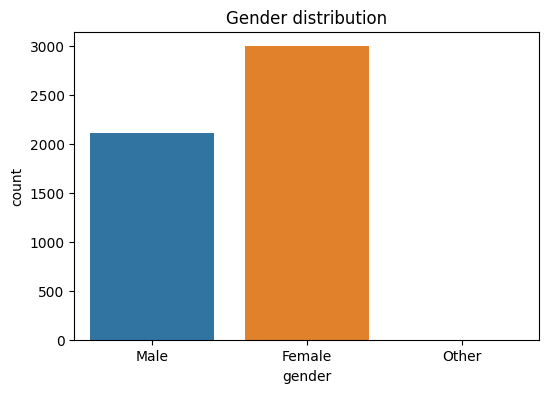

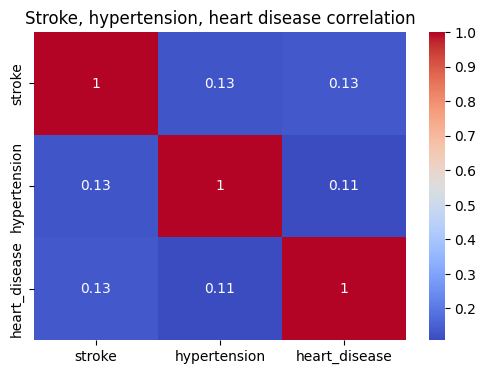

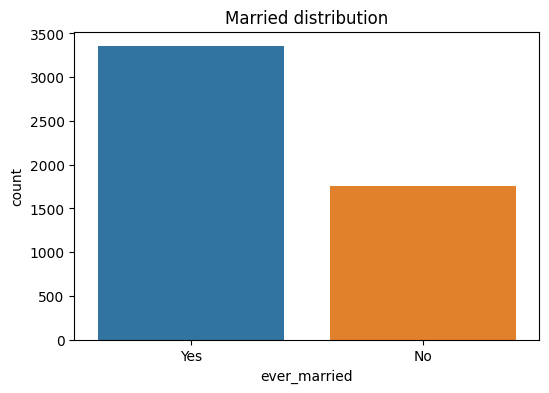

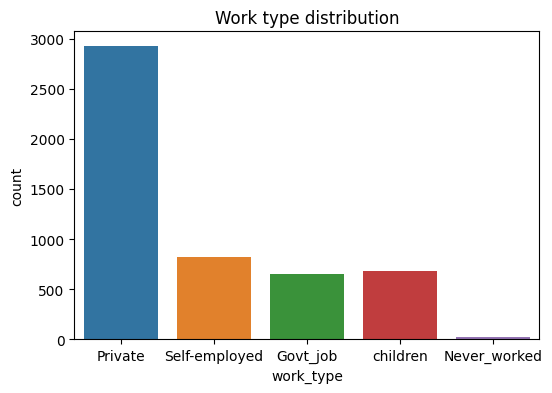

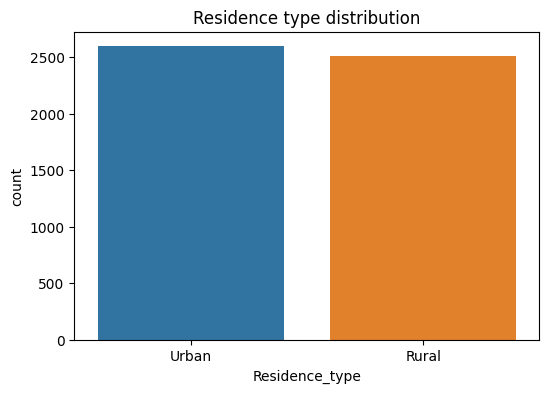

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


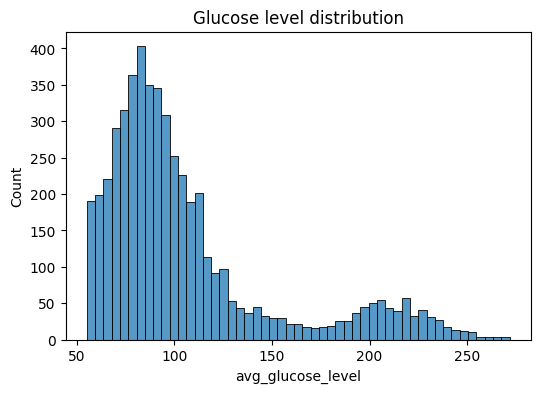

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


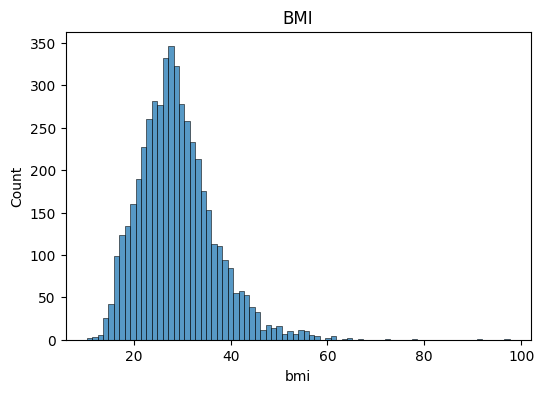

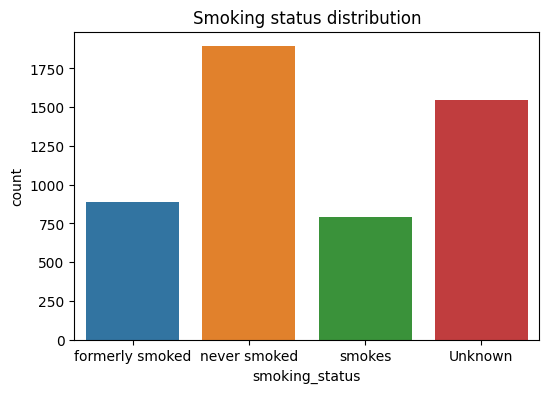

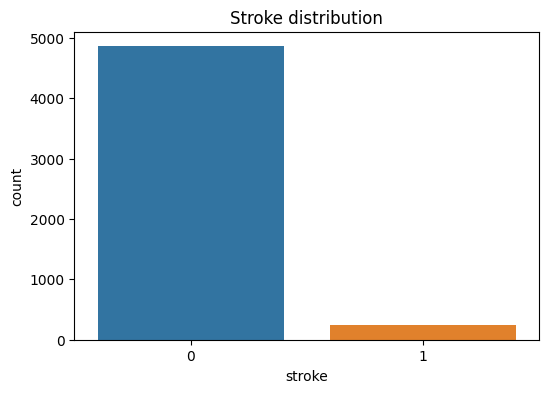

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.histplot(data=stroke_data, x='age')
plt.title('Age distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=stroke_data, x='gender')
plt.title('Gender distribution')
plt.show()

plt.figure(figsize=(6,4))
binary_df = pd.DataFrame(data=stroke_data, columns=['stroke', 'hypertension', 'heart_disease'])
corr = binary_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Stroke, hypertension, heart disease correlation')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=stroke_data, x='ever_married')
plt.title('Married distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=stroke_data, x='work_type')
plt.title('Work type distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=stroke_data, x='Residence_type')
plt.title('Residence type distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=stroke_data, x='avg_glucose_level')
plt.title('Glucose level distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=stroke_data, x='bmi')
plt.title('BMI')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=stroke_data, x='smoking_status')
plt.title('Smoking status distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=stroke_data, x='stroke')
plt.title('Stroke distribution')
plt.show()

# *4. Clean missing data and irrelevant column*

In [5]:
# Drop missing data
dropindex = [stroke_data[stroke_data['gender']=='Other'].index[0]]
stroke_data = stroke_data.drop(index=dropindex, axis=0)

stroke_data = stroke_data.dropna()

# Drop id column
stroke_data = stroke_data.drop(labels='id', axis=1)

# *5. Encode categorical data*

In [6]:
from sklearn.preprocessing import OrdinalEncoder

cat_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
num_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

full_train_data = stroke_data.copy()

encoder = OrdinalEncoder()
full_train_data[cat_columns] = encoder.fit_transform(stroke_data[cat_columns])

full_train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1


# *6. Deploy train/test split*

In [7]:
from sklearn.model_selection import train_test_split

y = full_train_data['stroke']
X = full_train_data.drop(labels='stroke', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train_shape:', X_train.shape)
print('Test_shape:', X_test.shape)

Train_shape: (3926, 10)
Test_shape: (982, 10)


# *7. Train model and generate prediction*

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9460285132382892


In [9]:
print('---classification report---\n')
print(classification_report(y_test, y_pred))

---classification report---

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
print('---confusion matrix---\n')
print(confusion_matrix(y_test, y_pred))

---confusion matrix---

[[929   0]
 [ 53   0]]


# *8. Oversample imbalanced data*

In [11]:
full_train_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0.0,4.0,0.0,103.08,18.6,0.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [12]:
# Separate into stroke and non-stoke data
stroke = full_train_data[full_train_data['stroke']==1]
non_stroke = full_train_data[full_train_data['stroke']==0]

# Oversample stroke data to match non-stroke count
stroke_oversampled = stroke.sample(n=len(non_stroke), replace=True, random_state=42)

# Combine data and shuffle
oversampled_train_data = pd.concat([non_stroke, stroke_oversampled]).sample(frac=1, random_state=42)

# Split into X and y
resampled_X = oversampled_train_data.drop('stroke', axis=1)
resampled_y = oversampled_train_data['stroke']

# *9. Repeat machine learning with oversampled data*

In [13]:
# Train/test split
resampled_X_train, resampled_X_test, resampled_y_train,resampled_y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)

print('Train_shape:', resampled_X_train.shape)
print('Test_shape:', resampled_X_test.shape)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(resampled_X_train, resampled_y_train)
resampled_y_pred = model.predict(resampled_X_test)

# Accuracy, classification report, confusion matrix
acc = accuracy_score(resampled_y_test, resampled_y_pred)
print('Accuracy:', acc)

print('---classification report---\n')
print(classification_report(resampled_y_test, resampled_y_pred))

print('---confusion matrix---\n')
print(confusion_matrix(resampled_y_test, resampled_y_pred))

Train_shape: (7518, 10)
Test_shape: (1880, 10)
Accuracy: 0.9936170212765958
---classification report---

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       922
           1       0.99      1.00      0.99       958

    accuracy                           0.99      1880
   macro avg       0.99      0.99      0.99      1880
weighted avg       0.99      0.99      0.99      1880

---confusion matrix---

[[910  12]
 [  0 958]]
